In [1]:
import pandas as pd
import numpy as np
import random
import pyttsx3
import ipywidgets as widgets
import csv
import numpy as np
import math as math
import ipympl
import statistics
from mpl_toolkits.mplot3d import axes3d

In [2]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

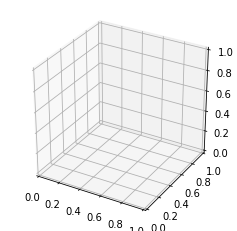

In [3]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')



In [4]:
def collapsedgibbs3NormV(n, rho, x, y, z):
    mat = mat=np.zeros((n,3))
    mat[0, ] = np.array([x,y,z])
    for i in range(1,n):
        x = int(10*np.random.normal(rho * y, math.sqrt(rho+rho**3), 1))/10
        y = int(10*np.random.normal(rho * x, math.sqrt(rho+rho**3), 1))/10
        z = int(10*np.random.normal(rho * x + rho * y, math.sqrt(rho+rho**3), 1))/10
        mat[i, ] = [x*100,y,z]
    return(mat)

In [5]:
save = collapsedgibbs3NormV(100, 0.9, 500, 24, 0.2)

<IPython.core.display.Javascript object>


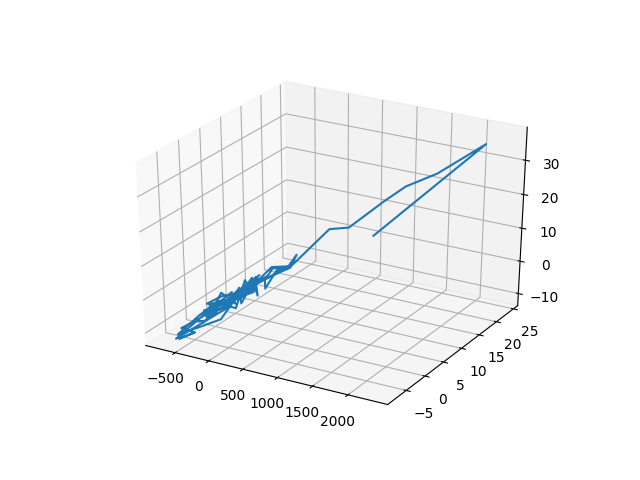

In [6]:
%matplotlib notebook
xs = np.full([100,1], None)
ys = np.full([100,1], None)
zs = np.full([100,1], None)
for i in range(0,len(save)):
    points = list(save[i])

    xs[i] = points[0]
    ys[i] = points[1]
    zs[i] = points[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot a basic wireframe.
ax.plot_wireframe(xs, ys, zs, rstride=10, cstride=10)

plt.show()

In [7]:
save = open("lyricsdata.csv")

In [8]:
csvreader = csv.reader(save)

In [9]:
header = []
header = next(csvreader)

In [10]:
df = pd.DataFrame(index=np.arange(8031), columns=np.arange(1))

In [11]:
rows = []
for row in csvreader:
        rows.append(row)

In [12]:
engine = pyttsx3.init()

In [13]:
voices = engine.getProperty("voices")

In [14]:
rate = engine.getProperty("rate")

In [15]:
volume = engine.getProperty("volume")

In [16]:
# lorenz attractor simulation

In [17]:
def chaosTheoryXYZ(n,time, sigma, rho, beta, x, y, z):
    pointFinal = []
    for i in range(0,n):
        dx = (sigma * (y - x))*time
        dy = (x * (rho - z) - y)*time
        dz = (x * y - beta * z)*time
        x = x + dx
        y = y + dy
        z = z + dz
        hue = 0
        
        point = [x, y, z]
        pointFinal += [point]
    return(pointFinal)

In [18]:
def text_to_speech(numberOfLines = 1, startingPoint = 1, time = 0.9, sigma = 0.4,
                   rho = 0.1, beta = 0.3, x = 500, y = 0, z=0):
    engine = pyttsx3.init()
    engine.setProperty("volume", z)
    engine.setProperty("voice", voices[y].id)
    engine.setProperty("rate", x)
    if(z !=0):
        sample = chaosTheoryXYZ(numberOfLines, time, sigma, rho, beta, x, y, z)
        print(sample)
        sample = np.array(sample)
        for i in range(startingPoint, startingPoint + int(len(sample)/2)):
            engine = pyttsx3.init()
            rows[i][0] = rows[i][0][1:]
            str1 = ''.join(rows[i])
            if(abs(sample[i-startingPoint,0]) >= 200 and abs(sample[i-startingPoint,0]) <= 1000):
                engine.setProperty("rate", abs(sample[i-startingPoint,0]))
            else:
                engine.setProperty("rate", 500)
            #engine.setProperty("voice", voices[int(sample[i-startingPoint,1])].id)
            if(abs(sample[i-startingPoint,2]) <= 1):
                engine.setProperty("volume", sample[i-startingPoint,2])
            else:
                engine.setProperty("volume", 0.5)
            engine.say(str1)
            engine.runAndWait(); 
            engine.stop()

In [19]:
widgets.interact(text_to_speech, numberOfLines = [0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                 startingPoint = (1,8020,1), time =(-0.99,0.99,0.01), sigma = (-0.99,0.99,0.01),
                 rho = (-0.99,0.99,0.01), x= (-900, 900, 10), y = (-47,47,1), z = (-1,1,0.1))


# make numeric relationships between bpm within lines



interactive(children=(Dropdown(description='numberOfLines', index=1, options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10…

<function __main__.text_to_speech(numberOfLines=1, startingPoint=1, time=0.9, sigma=0.4, rho=0.1, beta=0.3, x=500, y=0, z=0)>

In [20]:
#engine.endLoop()